<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/process/MechanicalCooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Mechanical Cooling
#@markdown Refrigeration is the process of cooling a space, substance, or system to lower and/or maintain its temperature below the ambient one (while the removed heat is rejected at a higher temperature). In other words, refrigeration means artificial (human-made) cooling[1][2]. Heat is removed from a low-temperature reservoir and transferred to a high-temperature reservoir. The work of heat transfer is traditionally driven by mechanical means, but can also be driven by heat, magnetism, electricity, laser, or other means. Refrigeration has many applications, including, but not limited to: household refrigerators, industrial freezers, cryogenics, and air conditioning. Heat pumps may use the heat output of the refrigeration process, and also may be designed to be reversible, but are otherwise similar to air conditioning units.
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

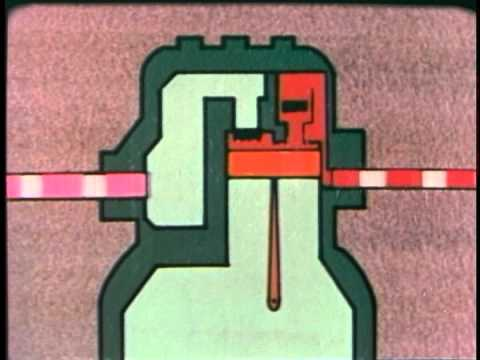

In [2]:
#@title  Mechanical Cooling Demo
#@markdown Introduction to mechanical cooling
from IPython.display import YouTubeVideo
YouTubeVideo('CSrhZzSA7aQ', width=600, height=400)

#A propane cooling loop

Propane refrigeration is a type of compression refrigeration. Propane (R290) has been used successfully in industrial refrigeration for many years, and is emerging as an increasingly viable alternative for homes and businesses. Propane's operating pressures and temperatures are well suited for use in air conditioning equipment, but because of propane’s flammability, great care is required in the manufacture, installation and servicing of equipment that uses it as a refrigerant.

https://en.wikipedia.org/wiki/Propane_refrigeration

In [6]:
import neqsim
from neqsim.thermo.thermoTools import *
from neqsim.process import stream,clearProcess,runProcess, pump, heater, cooler, expander, valve, compressor, heater
fluid_1 = fluid("srk")
fluid_1.addComponent("propane", 1.0)

fluid_1.setPressure(15.0, "bara")
fluid_1.setTemperature(30.0, "C")
fluid_1.setTotalFlowRate(1000.0, "kg/hr")

clearProcess()
stream_1 = stream(fluid_1)
stream_1.setSpecification("bubT");
stream_1.run();

JTvalve = valve(stream_1, 1.0)

cooler_1 = cooler(JTvalve.getOutStream())
cooler_1.setSpecification("out stream");

stream_2 = stream(cooler_1.getOutStream())
stream_2.setSpecification("dewT");
stream_2.getThermoSystem().setTemperature(273.15  - 30.0);
stream_2.run()

cooler_1.setOutStream(stream_2);
JTvalve.setOutletPressure(stream_2.getPressure());

compressor_1 = compressor(stream_2, 10.0);
compressor_1.setSpecification("out stream")
compressor_1.setOutletPressure(stream_1.getPressure())

heater = heater(compressor_1.getOutStream())

runProcess()

print("Compressor power ", compressor_1.getTotalWork()/1e3, " kW")
print("Cooling duty ", cooler_1.getDuty()/1e3, " kW")

Compressor power  24.63212365992675  kW
Cooling duty  72.87521619975152  kW
